# MACHINE LEARNING - TITANIC

Qual é a história sobre a embarcação do Titanic? Deixo o link de uma reportagem para você se inteirar sobre o incidente:
**link:** https://pt.wikipedia.org/wiki/RMS_Titanic

O desafio do Titanic é uma competição feita entre cientistas de dados com aprendizagem de máquina. Qual o intuito do desafio? Predizer qual a chance de sobrevivencia do naúfrago.

Nesse sentido este notebook tem o intuito de colaborar com a comunidade quanto a análise exploratória e principalmente quanto a melhoria do modelo (trial) desenvolvido.

**Etapas para definição do modelo:**
- Problema/objetivo: Prever a sobrevivência dos passageiros.
- Obtenção de dados: Fiz o downloado do Dataframe na base do kaggle pela api disponibilizada.
- Análise Exploratória: Verificar a distribuição / frequencia dos dados.
- Modelagem: Modelar o dado para preparação do modelo de machine learning.
- Construção do modelo de ML: Utilizada classificação.
- Resultados / experimento do modelo construido: Testo de acordo com o modelo se eu, sobreviveria ao incidente.

**Assertividade do Modelo**

O **score** ou o **R²** diz o percentual de assertividade do seu modelo preditivo, ou seja, como ele acerta.

Dados:
Os Data Frames disponibilizados pela Kaggle contém:
- Base de traino (train.csv) onde contem as informações principais para o modelo a ser analisado. Variaveis categóricas, numéricas e a variavel alvo, sobreviveu ou não. 
- Base de teste (test.csv): Base onde não tem informações alvo, para realmente verificar o modelo preditivo.
- Base de gabarito: Esse DF (gender_submission) seria o gabarito da plataforma kaggle.

1º etapa: Fiz o download dos DF em minha máquina pela api, e passo o caminho de onde estão os arquivos.

In [45]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline

In [46]:
path = 'C:/Users/William Cararo/Documents/Datasets/titanic/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [47]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

**Análise Exploratória:**

Para que serve?
- Análise inicial para averiguar como está a distribuição dos dados do DF.
- Verificar dados faltantes.
- Dimensões e tamanho da base.
- Tipo dos dados.
- Outliers e frequência.

Lembra do nosso objetivo?

**Target** = Feature 'Survived'

In [48]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


In [49]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S


**Dicionário dos Dados**

PassengerId: Número de identificação do passageiro

Survived: Informa se o passageiro sobreviveu ao desastre
0 = Não
1 = Sim
Pclass: Classe do bilhete

1 = 1ª Classe
2 = 2ª Classe
3 = 3ª Classe
Name: Nome do passageiro

Sex: Sexo do passageiro

Age: Idade do passageiro

SibSp: Quantidade de cônjuges e irmãos a bordo

Parch: Quantidade de pais e filhos a bordo

Ticket: Número da passagem

Fare: Preço da Passagem

Cabin: Número da cabine do passageiro

Embarked: Porto no qual o passageiro embarcou
C = Cherbourg
Q = Queenstown
S = Southampton

**Q1. Quais os tipos de cada variável?**

Variáveis Numéricas
Discretas
Pclass
SibSp
Parch
Contínuas
Age
Fare
Alvo
Survived
Chave Primária
PassengerId
Variáveis Categóricas
Name
Sex
Ticket
Cabin
Embarked

In [50]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

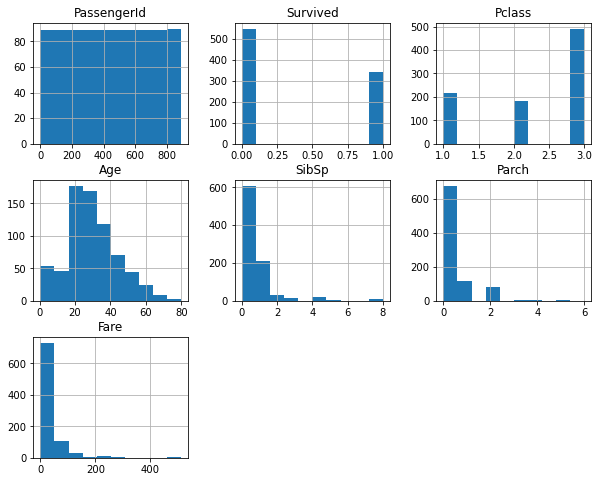

In [51]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));

In [52]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

Survived
Sex             
female  0.742038
male    0.188908

male      65%
female    35%
Name: Sex, dtype: object


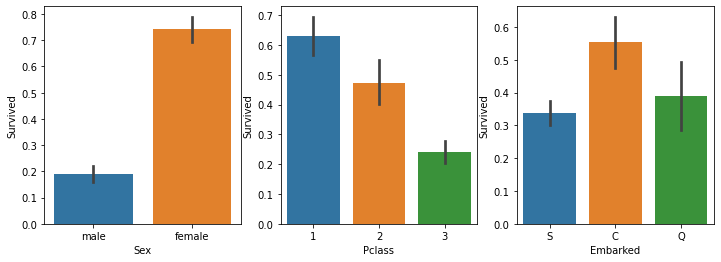

In [66]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)


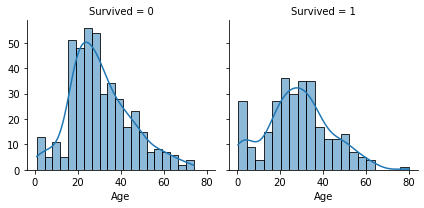

In [60]:
# grafico para plotar um histograma e ver a distribuição da idade.
# Analisando o gráfico conseguimos constatar que existe uma assimetria negativa nos dados de idade da base, porém os dados são quase que simétricos, sendo a média e mediana muito próximos..
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.histplot, 'Age',bins=20,kde = True)

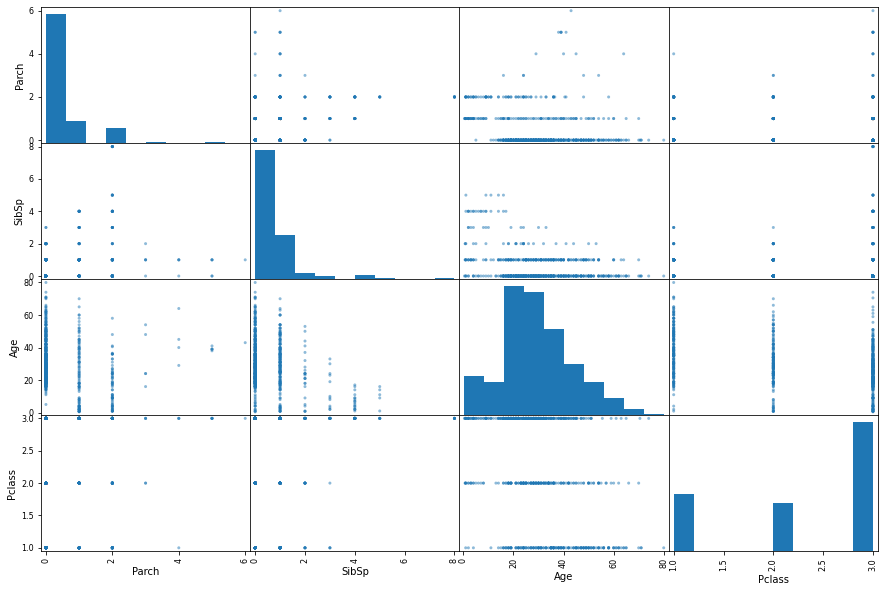

In [55]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

<AxesSubplot:>

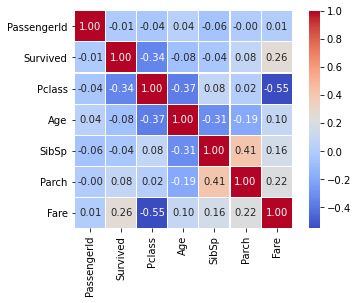

In [17]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True, annot_kws={'size':10})

**Pontos importantes da análise exploratória:**
- 65% dos dados são compostos por pessoas do sexo masculino.
- Maiores sobreviventes são do sexo feminino.
- Passageiros de 1 classe tiveram uma maior sobrevivencia, nos indicando duas variaveis influentes no modelo.
- Não existem missing values nos campos nominais.
- A zona de embarque com maior frequencia é de Southamptom.
- Temos a idade uma assimetria negativa, porém é quase simétrica pela mediana estar muito próximo da média.
- As Features não tem uma correlação direta com as demais.

In [18]:
#Pouca gente sabe que o método df.describe() pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento include=['O'].
#ATENÇÃO, é a letra 'O', e não o número 0!
train.describe(include=['O'])

Name   Sex    Ticket Cabin Embarked
count                     891   891       891   204      889
unique                    891     2       681   147        3
top     Gilinski, Mr. Eliezer  male  CA. 2343    G6        S
freq                        1   577         7     4      644

**Construção do modelo de ML**

Para facilitar a modelagem dos dados é mais facil juntar os dataframes em um único e depois realizar a extração de ambos dataframes após os dados estarem tratados.
Podemos utilizar formatos de label encoder (dummy) ou codificação das features. Após feito isso conseguiremos realizar as etapas de treino e teste.

In [19]:
train_index = train.shape[0]
test_index = test.shape[0]
target = train.Survived.copy()
train.drop(['Survived'],axis=1,inplace=True)


In [20]:
#merge de ambos DF´s em um único.
df_merge = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)

print('dataframe merge: (Linhas:{}x Dim:{})'.format(df_merge.shape[0],df_merge.shape[1]))
df_merge.sample(5)

dataframe merge: (Linhas:1309x Dim:11)


PassengerId  Pclass                                          Name  \
747           748       2                         Sinkkonen, Miss. Anna   
800           801       2                          Ponesell, Mr. Martin   
281           282       3              Olsson, Mr. Nils Johan Goransson   
1209         1210       3                     Jonsson, Mr. Nils Hilding   
230           231       1  Harris, Mrs. Henry Birkhardt (Irene Wallach)   

         Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
747   female  30.0      0      0  250648  13.0000   NaN        S  
800     male  34.0      0      0  250647  13.0000   NaN        S  
281     male  28.0      0      0  347464   7.8542   NaN        S  
1209    male  27.0      0      0  350408   7.8542   NaN        S  
230   female  35.0      1      0   36973  83.4750   C83        S

**Etapa de Seleção**

**Quais Features usaremos em nosso modelo preditivo?**

Assim como qualquer base de dados o operador que esta fazendo a análise irá perceber quais informações são, e quais não são importantes para seu modelo quanto a significância estatística. É claro que as vezes é necessário uma busca ou rever conceitos de tratamento de dados, mas aí que está o ganho em ser um cientista de dados. ;D
Lembre-se cada caso é um caso e tudo vai depender do objetivo/problema que você esta lidando. 

In [21]:
df_merge

PassengerId  Pclass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
...           ...     ...                                                ...   
1304         1305       3                                 Spector, Mr. Woolf   
1305         1306       1                       Oliva y Ocana, Dona. Fermina   
1306         1307       3                       Saether, Mr. Simon Sivertsen   
1307         1308       3                                Ware, Mr. Frederick   
1308         1309       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0       male  22.0      1      0           A/5 21171    7.2500   NaN        S  
1     female  38.0      1      0            PC 17599   71.2833   C85        C  
2     female  26.0      0      0    STON/O2. 3101282    7.9250   NaN        S  
3     female  35.0      1      0              113803   53.1000  C123        S  
4       male  35.0      0      0              373450    8.0500   NaN        S  
...      ...   ...    ...    ...                 ...       ...   ...      ...  
1304    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
1305  female  39.0      0      0            PC 17758  108.9000  C105        C  
1306    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307    male   NaN      0      0              359309    8.0500   NaN        S  
1308    male   NaN      1      1                2668   22.3583   NaN        C  

[1309 rows x 11 columns]

In [22]:
df_merge.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [23]:
df_merge

Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0          3    male  22.0      1      0    7.2500        S
1          1  female  38.0      1      0   71.2833        C
2          3  female  26.0      0      0    7.9250        S
3          1  female  35.0      1      0   53.1000        S
4          3    male  35.0      0      0    8.0500        S
...      ...     ...   ...    ...    ...       ...      ...
1304       3    male   NaN      0      0    8.0500        S
1305       1  female  39.0      0      0  108.9000        C
1306       3    male  38.5      0      0    7.2500        S
1307       3    male   NaN      0      0    8.0500        S
1308       3    male   NaN      1      1   22.3583        C

[1309 rows x 7 columns]

In [24]:
df_merge.isnull().sum()


Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Idade dos passageiros: (Média: 29.881137667304014 x Mediana: 28.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

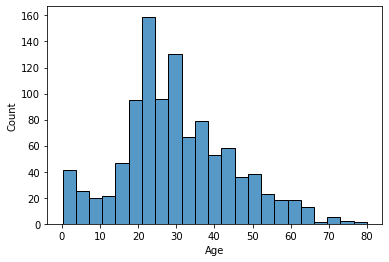

In [25]:
print('Idade dos passageiros: (Média: {} x Mediana: {}'.format(df_merge.Age.mean(),df_merge.Age.median()))

df_merge.Age.value_counts().head(20)
sns.histplot(data=df_merge,x='Age')

In [26]:
# Verificar a frequencia dos dados quanto aos dados de embarque para substituir o valor "vazio".
df_merge['Embarked'].value_counts()


S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [28]:
# age
age_mean = df_merge['Age'].mean()
df_merge['Age'].fillna(age_mean, inplace=True)

# fare
fare_median = df_merge['Fare'].median()
df_merge['Fare'].fillna(fare_median, inplace=True)

# embarked
df_merge['Embarked'].fillna('S', inplace=True)

O cálculo estatístico exige que trabalhemos com dados numéricos para conseguirmos realizar o cálculo de previsão, nesse sentido, temos de substituir valores nominais por valores numéricos. Nesse caso, temos de substituir o sexo por uma váriavel booleana, já para a variável embarked usei o modelo one hot encoder para transforma-lo em dummies.

In [29]:
# Para rodar o modelo de machine learning precisamos converter a variavel nominal (sexo) em um booleano.
df_merge['Sex'] = df_merge['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merge, columns=['Embarked'], prefix='Embarked')
df_merge = pd.concat([df_merge, embarked_dummies], axis=1)
df_merge.drop('Embarked', axis=1, inplace=True)

display(df_merge.head())

Pclass  Sex   Age  SibSp  Parch     Fare  Pclass  Sex   Age  SibSp  Parch  \
0       3    0  22.0      1      0   7.2500       3    0  22.0      1      0   
1       1    1  38.0      1      0  71.2833       1    1  38.0      1      0   
2       3    1  26.0      0      0   7.9250       3    1  26.0      0      0   
3       1    1  35.0      1      0  53.1000       1    1  35.0      1      0   
4       3    0  35.0      0      0   8.0500       3    0  35.0      0      0   

      Fare  Embarked_C  Embarked_Q  Embarked_S  
0   7.2500           0           0           1  
1  71.2833           1           0           0  
2   7.9250           0           0           1  
3  53.1000           0           0           1  
4   8.0500           0           0           1

In [30]:
df_merge = df_merge.loc[:,~df_merge.columns.duplicated()]
df_merge

Pclass  Sex        Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  \
0          3    0  22.000000      1      0    7.2500           0           0   
1          1    1  38.000000      1      0   71.2833           1           0   
2          3    1  26.000000      0      0    7.9250           0           0   
3          1    1  35.000000      1      0   53.1000           0           0   
4          3    0  35.000000      0      0    8.0500           0           0   
...      ...  ...        ...    ...    ...       ...         ...         ...   
1304       3    0  29.881138      0      0    8.0500           0           0   
1305       1    1  39.000000      0      0  108.9000           1           0   
1306       3    0  38.500000      0      0    7.2500           0           0   
1307       3    0  29.881138      0      0    8.0500           0           0   
1308       3    0  29.881138      1      1   22.3583           1           0   

      Embarked_S  
0              1  
1              0  
2              1  
3              1  
4              1  
...          ...  
1304           1  
1305           0  
1306           1  
1307           1  
1308           0  

[1309 rows x 9 columns]

**Etapa de recuperação**: Nessa etapa recupero os valores dos dados da tabela 'merge' e assim aplicaremos a ML em cada DF apartados.

In [31]:
train = df_merge.iloc[:train_index]
test = df_merge.iloc[train_index:]


 Analisando nosso problema. Predizer quais sobreviveriam e quais não. Nosso target é uma variável binária (0 e 1). Nesse sentido, optei pela utilização de teste de dois modelos, sendo a regressão logística e árvore de decisão no modelo.
 
 Vamos lá:
 - Importar as bibliotecas
 - Treinar modelos
 - Testar modelo

In [32]:
# Importar as bibliotecas do modelo de Machine Learning/Logistic Regression e Arvore de decisão.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [33]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.25


In [34]:
y_pred_lr = lr_model.predict(test)


In [35]:
# ML - modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [36]:
y_pred_tree = tree_model.predict(test)


# Teste do modelo preditivo. 

Imaginemos que eu e minha família tenhamos embarcado também no titanic. Teriamos sobrevivido ao desastre?


Vamos deixar para o modelo nos dizer.


In [37]:
# Verificando a quantidade de features para criar um array com as devidas metricas necessárias. 
# No caso as 9 dimensões para o modelo preditivo.
train.head(2)

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0       3    0  22.0      1      0   7.2500           0           0   
1       1    1  38.0      1      0  71.2833           1           0   

   Embarked_S  
0           1  
1           0

In [38]:
# Criei um array com as minhas informações e deduzindo em qual classe compariamos, bem como aonde seria o embarque.
william = np.array([2, 0, 28, 1, 0, 32.2, 0, 0, 1]).reshape((1, -1))
pedro = np.array([2, 0, 55, 1, 1, 32.2, 0, 0, 1]).reshape((1, -1))
mariana = np.array([2, 1, 29, 1, 0, 32.2, 0, 0, 1]).reshape((1, -1))
melania = np.array([2, 1, 54, 1, 1, 32.2, 0, 0, 1]).reshape((1, -1))


william_res = tree_model.predict(william)[0]
pedro_res = tree_model.predict(pedro)[0]
mariana_res = tree_model.predict(mariana)[0]
melania_res = tree_model.predict(melania)[0]

In [39]:
#Substituindo a variavel boleana pelo resultado pela string de texto.
#Caso queiramos automatizar essa lógica fariamos uma função para os nomes retornando o print do valor do resultado do modelo. Mas como são só 4 nomes fiz dessa forma.
william_res=str(william_res)
pedro_res = str(pedro_res)
melania_res =  str(melania_res)
mariana_res = str(mariana_res)


william_res = william_res.replace('0','não teria sobrevivido ao incidente!')
pedro_res = pedro_res.replace('0','não teria sobrevivido ao incidente!')
melania_res = melania_res.replace('1','teria sobrevivido ao incidente!')
mariana_res = mariana_res.replace('1','teria sobrevivido ao incidente!')



In [40]:
# Print do resultado do modelo em base do resultado do modelo instanciados anteriormente em objetos.
print('Resultados do modelo: \n')
print('William %s' % william_res)
print('Pedro %s' % pedro_res)
print('Mariana %s' % mariana_res)
print('Melania %s' % melania_res)

Resultados do modelo: 

William não teria sobrevivido ao incidente!
Pedro não teria sobrevivido ao incidente!
Mariana teria sobrevivido ao incidente!
Melania teria sobrevivido ao incidente!


In [41]:
# Modelo de resultado nominal do modelo preditivo.
# Simples e objetivo
print('William: \t{}'.format(tree_model.predict(william)[0]))
print("Pedro:   \t{}".format(tree_model.predict(pedro)[0]))
print("Mariana: \t{}".format(tree_model.predict(mariana)[0]))
print("Melania: \t{}".format(tree_model.predict(melania)[0]))

William: 	0
Pedro:   	0
Mariana: 	1
Melania: 	1
